#Install & Import the library

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/21accel/bank_churn_prediction/main/BankChruner-Processed-2.csv')
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,1,2,3,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,2,5,3,1,1,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,3,2,4,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,2,4,1,0,1,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,0,2,3,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,1,2,3,1,2,1,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,1,2,-1,3,2,1,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,2,1,1,2,1,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,1,2,3,0,2,1,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


#Without SMOTE

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

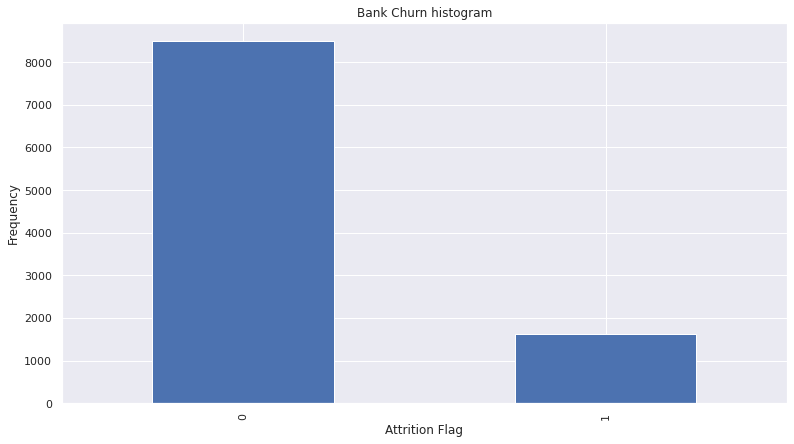

In [ ]:
plt.figure(figsize = (13,7))
pd.value_counts(data['Attrition_Flag']).plot.bar()
plt.title('Bank Churn histogram')
plt.xlabel('Attrition Flag')
plt.ylabel('Frequency')
data['Attrition_Flag'].value_counts()

In [ ]:
X = pd.DataFrame(data.loc[:, data.columns != 'Attrition_Flag'])
y = pd.DataFrame(data.loc[:, data.columns == 'Attrition_Flag'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (10127, 19)
Shape of y: (10127, 1)


## train 80%, test 20%

In [ ]:
# train 80%, test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
knn.score(X_train, y_train)

0.9229724725342551

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred), ": is the precision score")
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")

[[1618   77]
 [ 148  183]] : is the confusion matrix
0.8889437314906219 : is the accuracy score
0.7038461538461539 : is the precision score
0.552870090634441 : is the recall score
0.6192893401015229 : is the f1 score


In [ ]:
from sklearn.model_selection import cross_val_score
#train model with cv of 5
cv_scores = cross_val_score(knn, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[0.76011846 0.84205331 0.9254321  0.93432099 0.84098765]
cv_scores mean:0.8605825015538737


#With SMOTE

In [ ]:
pip install imbalanced-learn

In [ ]:
# train 80%, test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (8101, 19)
Number transactions y_train dataset:  (8101, 1)
Number transactions X_test dataset:  (2026, 19)
Number transactions y_test dataset:  (2026, 1)


In [ ]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1' in data train: {}".format(sum(y_train['Attrition_Flag']==1)))
print("Before OverSampling, counts of label '0' in data train: {} \n".format(sum(y_train['Attrition_Flag']==0)))

sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1' in data train: 1296
Before OverSampling, counts of label '0' in data train: 6805 

After OverSampling, the shape of train_X: (13610, 19)
After OverSampling, the shape of train_y: (13610,) 

After OverSampling, counts of label '1': 6805
After OverSampling, counts of label '0': 6805


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
knn.score(X_train, y_train)

0.9056906554746328

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[1440  255]
 [  77  254]] : is the confusion matrix
0.8361303060217177 : is the accuracy score
0.49901768172888017 : is the precision score
0.7673716012084593 : is the recall score
0.6047619047619047 : is the f1 score


In [ ]:
#train model with cv of 5
cv_scores = cross_val_score(knn, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.76011846 0.84205331 0.9254321  0.93432099 0.84098765]
cv_scores mean:0.8605825015538737


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


#Hyperparameter Tuning

##With data using SMOTE

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50),
              "weights": ["uniform", "distance"],
              "algorithm":['ball_tree','kd_tree','brute'],
              'p':[1,2],
              'metric' : ['minkowski','euclidean','manhattan']}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
gridsearch.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': range(1, 50), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gridsearch.best_params_

{'algorithm': 'ball_tree',
 'metric': 'minkowski',
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

In [ ]:
gridsearch.best_score_

0.9221160911094783

In [ ]:
y_pred_2 = gridsearch.predict(X_test)

In [ ]:
gridsearch.score(X_train_res, y_train_res)

1.0

In [ ]:
print(confusion_matrix(y_test, y_pred_2), ": is the confusion matrix")
print(accuracy_score(y_test, y_pred_2), ": is the accuracy score")
print(precision_score(y_test, y_pred_2), ": is the precision score")
print(recall_score(y_test, y_pred_2), ": is the recall score")
print(f1_score(y_test, y_pred_2), ": is the f1 score")

[[1516  179]
 [ 108  223]] : is the confusion matrix
0.8583415597235933 : is the accuracy score
0.554726368159204 : is the precision score
0.6737160120845922 : is the recall score
0.6084583901773533 : is the f1 score


##With data not using SMOTE

In [ ]:
X = np.array(data.loc[:, data.columns != 'Attrition_Flag'])
y = np.array(data.loc[:, data.columns == 'Attrition_Flag'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (10127, 19)
Shape of y: (10127, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (8101, 19)
Number transactions y_train dataset:  (8101, 1)
Number transactions X_test dataset:  (2026, 19)
Number transactions y_test dataset:  (2026, 1)


In [ ]:
parameters = {"n_neighbors": range(1, 50),
              "weights": ["uniform", "distance"],
              "algorithm":['ball_tree','kd_tree','brute'],
              'p':[1,2],
              'metric' : ['minkowski','euclidean','manhattan']}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
gridsearch.fit(X_train, y_train.ravel()) #.ravel() dibutuhkan untuk y_train agar gridsearch bisa berjalan

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': range(1, 50), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gridsearch.best_params_

{'algorithm': 'ball_tree',
 'metric': 'minkowski',
 'n_neighbors': 10,
 'p': 1,
 'weights': 'distance'}

In [ ]:
gridsearch.best_score_

0.8969268322404247

In [ ]:
y_pred_3 = gridsearch.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_3), ": is the confusion matrix")
print(accuracy_score(y_test, y_pred_3), ": is the accuracy score")
print(precision_score(y_test, y_pred_3), ": is the precision score")
print(recall_score(y_test, y_pred_3), ": is the recall score")
print(f1_score(y_test, y_pred_3), ": is the f1 score")

[[1645   72]
 [ 133  176]] : is the confusion matrix
0.8988153998025666 : is the accuracy score
0.7096774193548387 : is the precision score
0.56957928802589 : is the recall score
0.6319569120287253 : is the f1 score


#Kesimpulan

- Klasifikasi menggunakan KNN untuk kasus Credit Card Churning Prediction ini menghasilkan akurasi rata-rata di atas 85%. Akan tetapi dengan menggunakan beberapa metode penghitungan akurasi seperti nilai skor KNN, precision, recall, dan f1 hasilnya berbeda-beda.

- Karena dataset yang ada tidak seimbang antara jumlah pengguna yang telah Churn dan yang masih tetap, maka dilakukan metode SMOTE untuk data yang telah Churn, akan tetapi sebagian besar hasil dari data yang telah di-SMOTE menghasilkan penurunan akurasi sebesar 3-6%.

- KNN memiliki kekurangan dalam masalah komputasi yang berat dibandingkan algoritma lain, sehingga ketika melakukan Hyperparameter Tuning akan memakan waktu yang cukup lama meskipun sudah menggunakan server dari Google Colab yang memiliki spesifikasi lebih tinggi dari komputer pribadi pada umumnya
